# Vroom App EDA
# Contents <a id='back'></a>


* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 Duplicates](#duplicates) 
    * [2.2 Missing values](#missing_values)
    * [2.3 Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Explanatory data analysis](#eda) 
    * [3.1 Distribution of price and its correlation to condition and model year.](#eda1)
    * [3.2 The correlation between odometer and condition.](#eda2)
    * [3.3 Top 10 car models, their types and price.](#eda3)
* [Findings](#end)

## Introduction <a id='intro'></a>
In this analysis, we explore the relationship between the price and year of manufacture of used cars. The dataset consists of key attributes such as price, year of manufacture, model, condition, odometer reading, transmission type, and car type. Among these variables, we focus on price, condition, model, odometer, and year of manufacture as they are fundamental factors influencing the value of used cars.

### Goal
Understand the dynamics of the used car market by analyzing factors such as:

1. Distribution of price and its correlation to condition and model year.
2. The correlation between odometer and condition. 
3. Top 10 car models, their types and price. 

EDA helps customers make informed decisions about which cars to consider, understand their pricing relative to their features and condition, and ultimately find the best possible deal.

### Stages

First, we evaluate the quality of the data and see whether its issues are significant. Then, during data preprocessing, we account for the most critical problems.
 
The analysis consists of three stages:
 1. Data overview
 2. Data preprocessing
 3. Explanatory data analysis
 
[Back to Contents](#back)


## Stage 1. Data overview <a id='data_review'></a>

Obtaining the general information about the table.


Importing the relevant libraries.

In [225]:
#Importing libraries to work with the dataset
import pandas as pd
#Adding simple visualization library
import matplotlib.pyplot as plt
plt.style.use("_mpl-gallery")
#Adding simple visualization library
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
#Adding simple visualization library
import plotly.graph_objects as go
#Adding simple visualization library
import plotly.express as px

Loading the data

In [226]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('vehicles_us.csv') 

Viewing the dataframe

In [227]:
#Return number of rows and columns
df.shape

(51525, 13)

In [228]:
#Reading the file.Return first 10 rows of the dataset
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [229]:
#Return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The table contains thirteen columns. They all store different data types:

According to the documentation:
- `'price'` — price of the vehicle, data type: int 64
- `'model_year'` — year of manufacture, data type: float64
- `'model'` — model of the vehicle, data type: object
- `'condition'` - condition of the vehicle, data type: object
- `'cylinders'` — number of cylinders, data type: float64
- `'fuel'` — type of fuel used by vehicle, data type: object
- `'odometer'` — mileage of the vehicle, data type: float64
- `'transmission'` — automatic or manual, data type: object
- `'typer'` — type of the vehicle, data type: object
- `'paint_color'` — color of the vehicle, data type:object
- `'is_4wd'` — four-wheel-drive, data type: object
- `'data_posted'` — when the vehicle was posted, data type: object
- `'days_listed'` — number of days the vehicle is listed, data type: int64


### Conclusions <a id='data_review_conclusions'></a>

_Each row in the table stores data on a vehicle that was listed for sale. This dataset contains a lot of information for conducting our analysis and gaining valuable insights. The data is sufficient for further analysis._

In the data-cleaning stage, we are going to look for duplicates first and then deal with missing values. 


[Back to Contents](#back)


## Stage 2. Data preprocessing <a id='data_preprocessing'></a>


### Duplicates <a id='duplicates'></a>
Next we find number of __obvious duplicates__ in the table:


In [230]:
#checking for duplicates
df.duplicated().sum()

0

In [231]:
#droping duplicates
df=df.drop_duplicates()
#checking for duplicates again
df.duplicated().sum()

0

### Conclusion <a id='data_preprocessing_conclusions'></a>
_There are no duplicates in the dataset._

[Back to Contents](#back)

### Missing values <a id='missing_values'></a>
First, we find the number of __missing values__ in the table.



In [232]:
#Display number of missing values per column
print(df.isnull().sum()) 

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


There are missing values in four columns of the data frame, however, not all missing values affect the research. For instance, the missing values in `paint_colr` and `is_4wd` are not critical. We simply replace them with clear markers.

But missing values in `'model_year'`, `'cylinders'`, `'odometer'` can affect further analysis. So we replace the missing values with statistics of the corresponding column. 


We will start with replacing the missing values in `'model_year'` column. 

In [233]:
#Display rows with the missing values
df[df.model_year.isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [234]:
#Checking the descriptive statistics data.
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [235]:
#Filling in the NaN values in model_year with median using group by model.
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

In [236]:
#Checking the value for model_year of ford f-150
df.loc[1]

price                25500
model_year          2011.0
model           ford f-150
condition             good
cylinders              6.0
fuel                   gas
odometer           88705.0
transmission     automatic
type                pickup
paint_color          white
is_4wd                 1.0
date_posted     2018-10-19
days_listed             50
Name: 1, dtype: object

In [237]:
#Checking the value for model_year of chevrolet silverado 3500hd.
df.loc[51488]

price                                21900
model_year                          2013.0
model           chevrolet silverado 3500hd
condition                        excellent
cylinders                              8.0
fuel                                diesel
odometer                          203000.0
transmission                     automatic
type                                 truck
paint_color                          white
is_4wd                                 1.0
date_posted                     2018-12-27
days_listed                             37
Name: 51488, dtype: object

_We can see that the model_year for tested car models were replaced with the values of the year meaning that there are no more missing values._

Next, we replace the missing values in `'odometer'` column. 

In [238]:
#Display rows with the missing values
df[df.odometer.isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [239]:
#Describing a dataframe to see a mean.
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

From the descriptive statistic analysis, we can see that the mean is very close to the median, signifying a normal distribution.


In [240]:
#Filling in the NaN values in odometer with median using group by condition.
df['odometer'] = df['odometer'].fillna(df.groupby('condition')['odometer'].transform('mean'))


In [241]:
#Checking the values for the row with a condition marked 'fair'.
df.loc[3]


price                    1500
model_year             2003.0
model              ford f-150
condition                fair
cylinders                 8.0
fuel                      gas
odometer        183062.233577
transmission        automatic
type                   pickup
paint_color               NaN
is_4wd                    NaN
date_posted        2019-03-22
days_listed                 9
Name: 3, dtype: object

In [242]:
#Checking the value for the row with a condition marked 'excellent'.
df.loc[51519]

price                   11750
model_year             2015.0
model            honda accord
condition           excellent
cylinders                 4.0
fuel                      gas
odometer        106687.682258
transmission        automatic
type                    coupe
paint_color               NaN
is_4wd                    NaN
date_posted        2018-11-24
days_listed                89
Name: 51519, dtype: object

Replace the missing values in `'cylinders'` column. 

In [243]:
#Display rows with the missing values
df[df.cylinders.isna()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.000000,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.000000,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.000000,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.000000,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.000000,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.000000,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.000000,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.000000,automatic,sedan,white,NaN,2018-06-22,28


In [244]:
#Filling in the NaN values in odometer with mode using group by model.
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))
df['cylinders'].isna().sum()

0

In [245]:
#Checking the missing values of cylinders chrysler 300.
df.loc[36]

price                  10499
model_year            2013.0
model           chrysler 300
condition               good
cylinders                6.0
fuel                     gas
odometer             88042.0
transmission       automatic
type                   sedan
paint_color              NaN
is_4wd                   NaN
date_posted       2018-05-05
days_listed               22
Name: 36, dtype: object

Replacing the missing values in `'paint_colr'` and `'is_4wd'` with markers 'unknown'.

In [246]:
# looping over column names and replacing missing values in colums paint_colour and is_4wd with 'unknown'
columns_to_replace = ['paint_color','is_4wd']
for column in columns_to_replace:
   df[column] = df[column].fillna('unknown')

In [247]:
#Display number of missing values per column
print(df.isnull().sum()) 

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


### Conclusions <a id='data_preprocessing_conclusions'></a>
_All missing values have been addressed and now equal zero._
_The absence of duplicates will make the results more precise and easier to understand._

Now we can move on to EDA.

[Back to Contents](#back)


## Stage 3. Explanatory data analysis <a id='eda'></a>




### Distribution of price and its correlation to condition and model year. <a id='eda1'></a>




### Univariate analysis

First, we explore the __distribution of price__. 

In [248]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

_From the descriptive statistics data, we can see that there are several listings priced at 1 USD. Let's investigate how many vehicles that cost only 1 dollar were listed in the dataset._

In [249]:
#Checking the count of vehicles priced 1 USD
df['price'][df['price']==1].count()

798

In [250]:
#Checking the count of vehicles priced less than 500 USD
df['price'][df['price']<500].count()

1069

_There are 798 cars priced 1 dollar. We assume that this price isn't real, and was added just to fill in the needed information. Consequently, this data should be dropped for a clear result. Moreover, listings with a price less than 500 USD don't look reliable and should be dropped too._

In [251]:
#Updating the dataset by removing prices under 500 USD.
df = df[df['price']>500]
df.to_csv('df.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50377 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50377 non-null  int64  
 1   model_year    50377 non-null  float64
 2   model         50377 non-null  object 
 3   condition     50377 non-null  object 
 4   cylinders     50377 non-null  float64
 5   fuel          50377 non-null  object 
 6   odometer      50377 non-null  float64
 7   transmission  50377 non-null  object 
 8   type          50377 non-null  object 
 9   paint_color   50377 non-null  object 
 10  is_4wd        50377 non-null  object 
 11  date_posted   50377 non-null  object 
 12  days_listed   50377 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.4+ MB


In [252]:
#Checking the count of vehicles priced less than 500 USD
df['price'][df['price']<500].count()

0

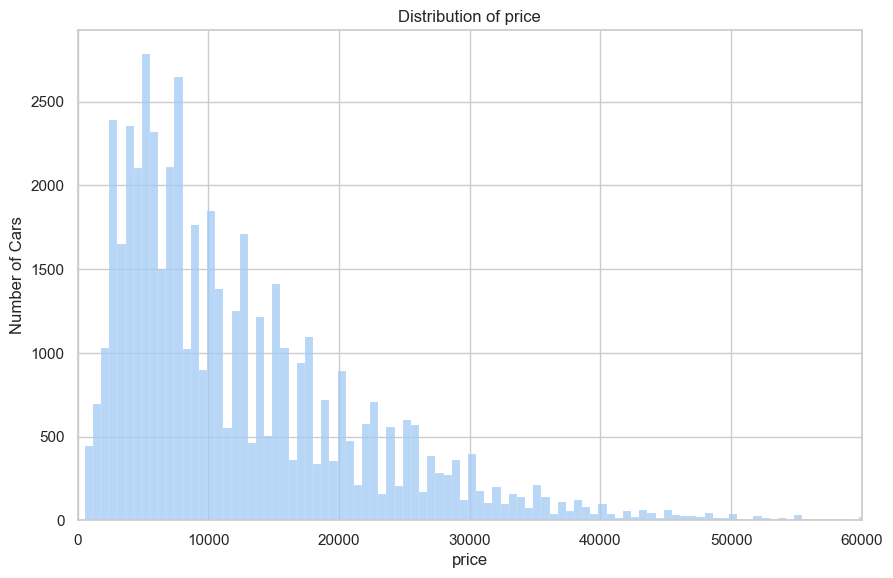

In [253]:
# Plotting a histogram with corrected dataset.
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="price",bins=600).set(title="Distribution of price",ylabel="Number of Cars")
plt.xlim(0, 60000)
plt.show()

_From the histogram above we can see a downward trend,with the followng insight:_

* _The distribution of prices is right skewed, thus the largest number of listed vehicles will cost a customer up to 10k USD._
* _In this type of distribution, the median provides more accurate information about the average price, which is 9500 USD._
* _There are also some outliers, cars with extremely high cost, it can be explained by the uniqueness of the car to its high popularity._

### Bivariate analysis
Next, let's look at the correlation between __car prices__ and their __condition__. 

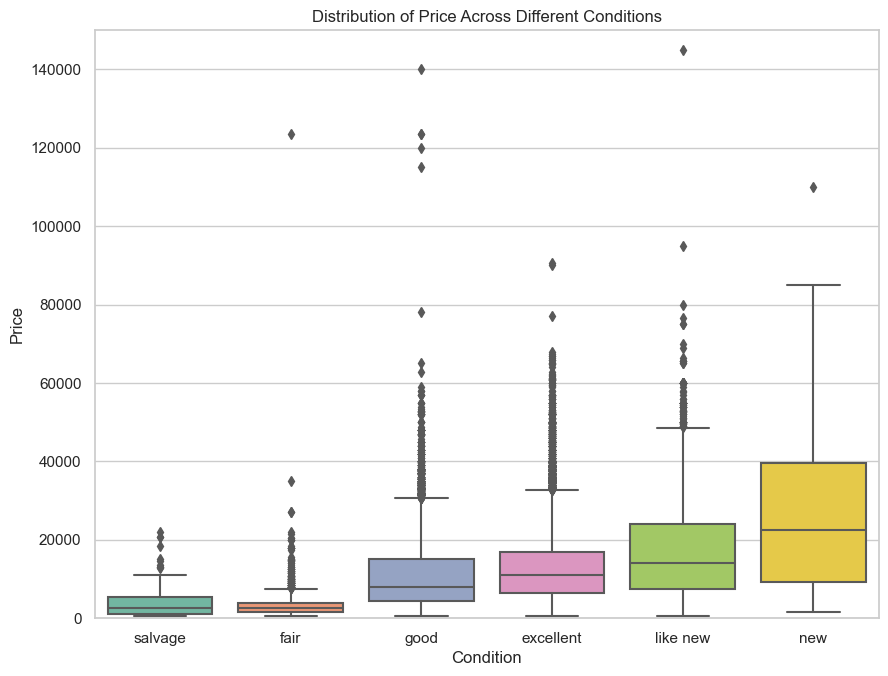

In [254]:
# Define the desired order of conditions
condition_order = ['salvage', 'fair', 'good','excellent', 'like new', 'new']
# Convert the 'condition' column to categorical with the desired order
df['condition'] = pd.Categorical(df['condition'], categories=condition_order, ordered=True)
# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='price', data=df, palette='Set2')
plt.ylim(0, 150000)
plt.title('Distribution of Price Across Different Conditions')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

_From the scatterplot above we can see the correlation between the condition of the vehicle and its price._
* _Generally, the higher the price, the better the car is kept._
* _There are some outliers in good condition. It can be explained by the fact that cars are better-preserved, rare, exclusive, or in high demand._


Next, let's look at the correlation between __car prices__ and their __model_year__.


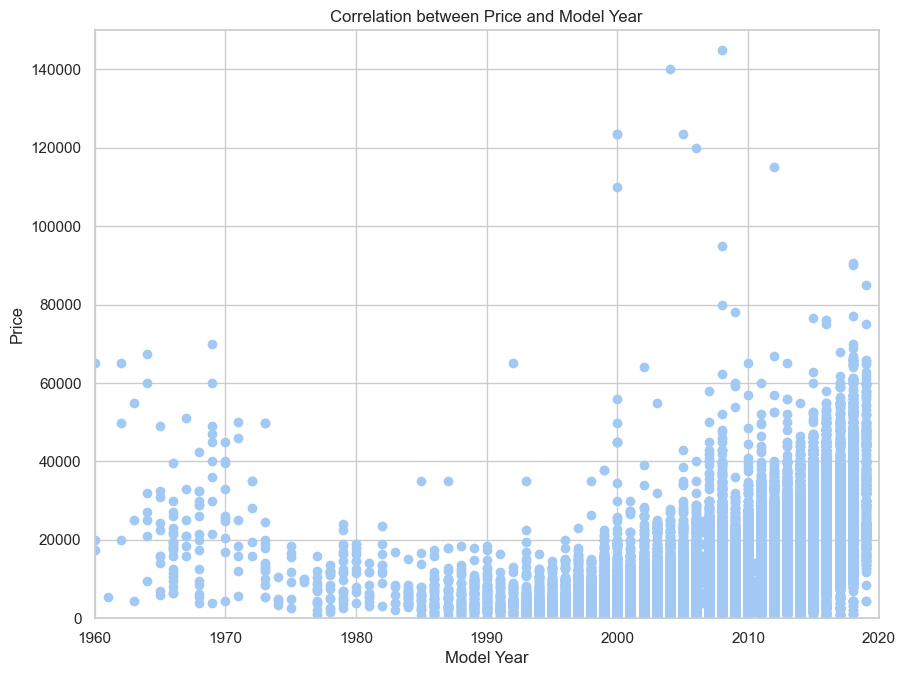

In [255]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['model_year'], df['price'])
plt.title('Correlation between Price and Model Year')
plt.ylim(0, 150000)
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.xlim(1960, 2020)
plt.grid(True)
plt.show()

_Another upward trend is displayed, with the following patterns:_
* _A large number of cars for sale were manufactured between 2000 and 2020 and they are in the price range of up to 4k USD._
* _Additionally, we can see that more outliers were manufactured between 2000 and 2013. This can be explained by the fact that very famous models were produced in those years that are still relevant and valuable today._
* _Another pattern displayed, vehicles produced between 1960 and 1970 can cost similar to ones produced in recent years, it might happen due to their rarity, historical significance, and collector demand for vintage vehicles._




[Back to Contents](#back)

### The correlation between odometer and condition. <a id='eda2'></a>

Let's look at the correlation between __odometer__ and __condition__. 

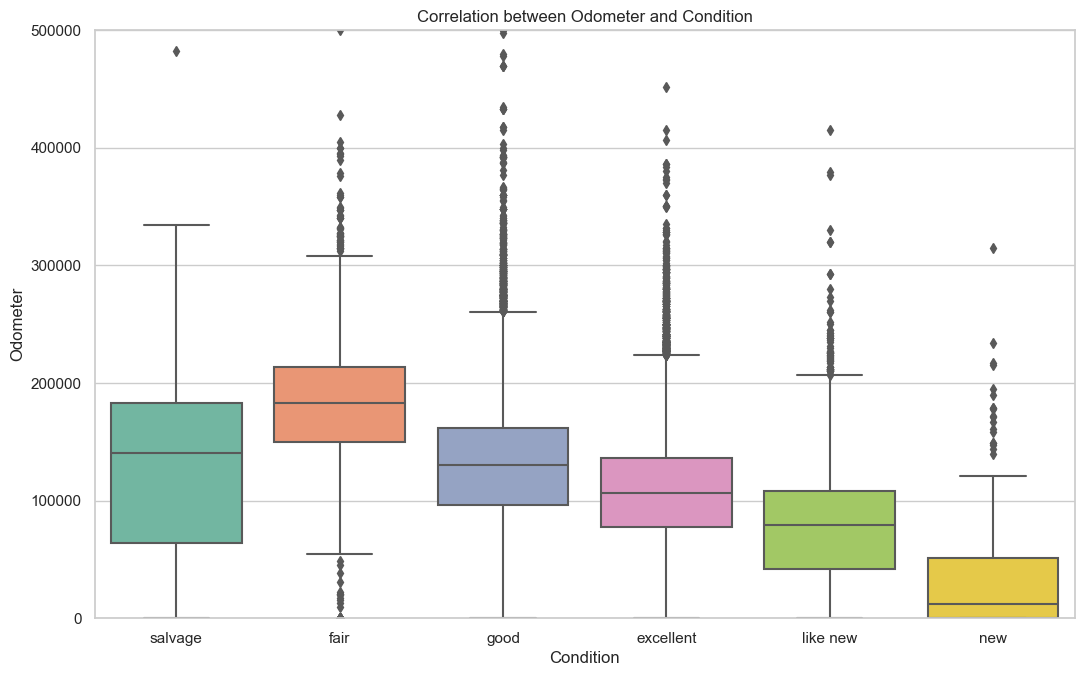

In [256]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='odometer', data=df, palette='Set2')
plt.title('Correlation between Odometer and Condition')
plt.ylim(0, 500000)
plt.xlabel('Condition')
plt.ylabel('Odometer')
plt.show()

_Based on the scatterplot, we can say that:_

* _It's generally true that cars with fewer miles are in better shape. This means they're less likely to have problems and tend to last longer._
* _There are outliers in the good condition, we assume that those vehicles are reliable and very agile or they were well kept._
* _There are also some outliers in a new condition with mileage above 200000 miles. It can be attributed to the fact that those cars were used in the test drives, displayed in the events, or by the fact that there is an error in the dataset and further analysis has to be conducted to investigate this issue._


[Back to Contents](#back)

### Top 10 car models, their types and price. <a id='eda3'></a>

Now, let's explore __the most popular models__ listed for ads. 

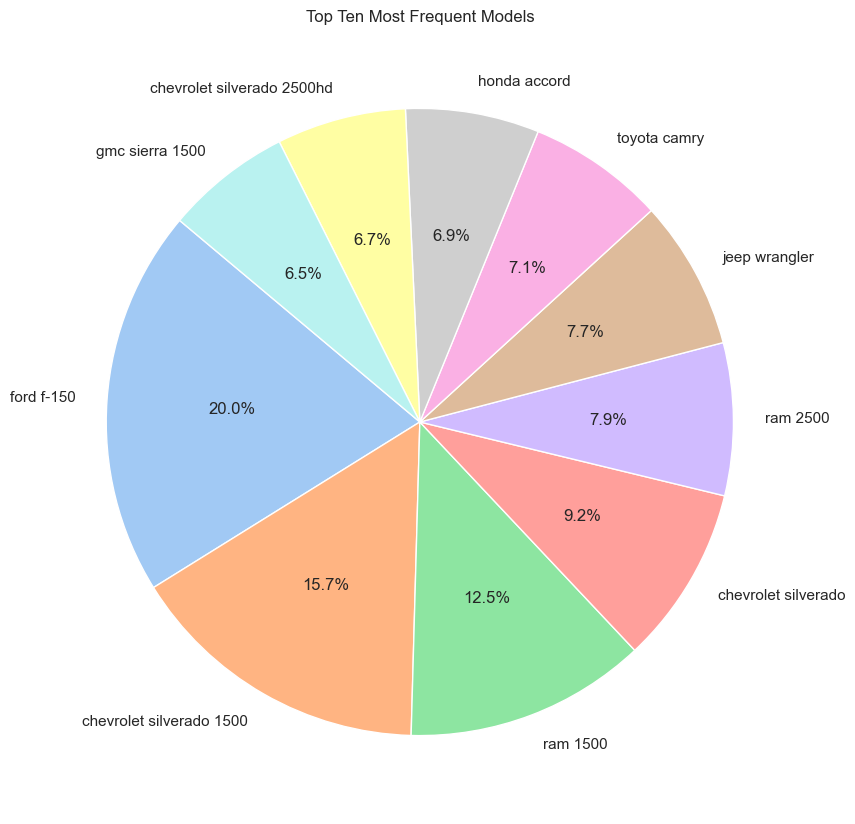

In [257]:
# Get the top 10 car models
top_ten_models = df['model'].value_counts().head(10)

# Filter the DataFrame to include only the top 10 models
#df_top_10 = df[df['model'].isin(top_ten_models)]

# Plotting 5 top models for narrowing down the result.
plt.figure(figsize=(8, 8))
plt.pie(top_ten_models, labels=top_ten_models.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Ten Most Frequent Models')
plt.show()

Let's check their __types__. 

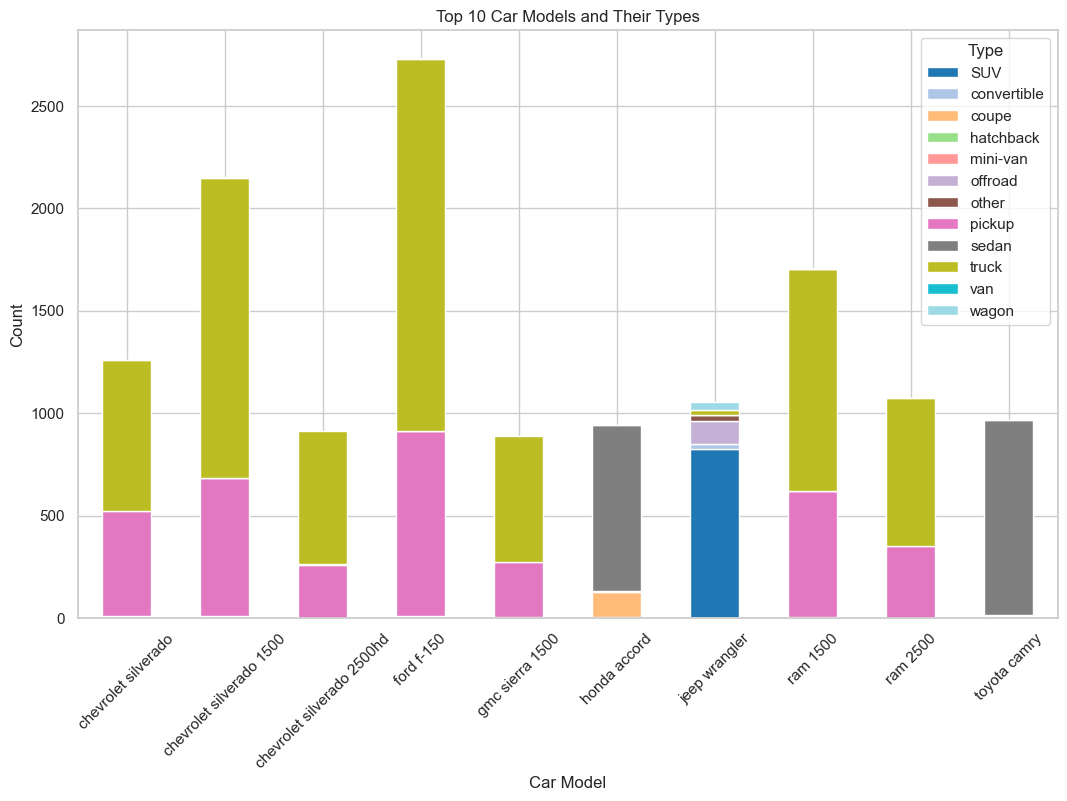

In [258]:
# Get the top 10 car models
top_10_models = df['model'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 models
df_top_10 = df[df['model'].isin(top_10_models)]

# Count the number of occurrences of each type for each model
type_counts = df_top_10.groupby(['model', 'type']).size().unstack(fill_value=0)

# Plotting
type_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Top 10 Car Models and Their Types')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

_The results:_
* _In the American market the most popular vehicle types are pickup trucks._
* _The second most popular vehicle is the sedan_
* _SUV takes the third place._
  
 
Let's investigate the __price__ range for the top 10 models.

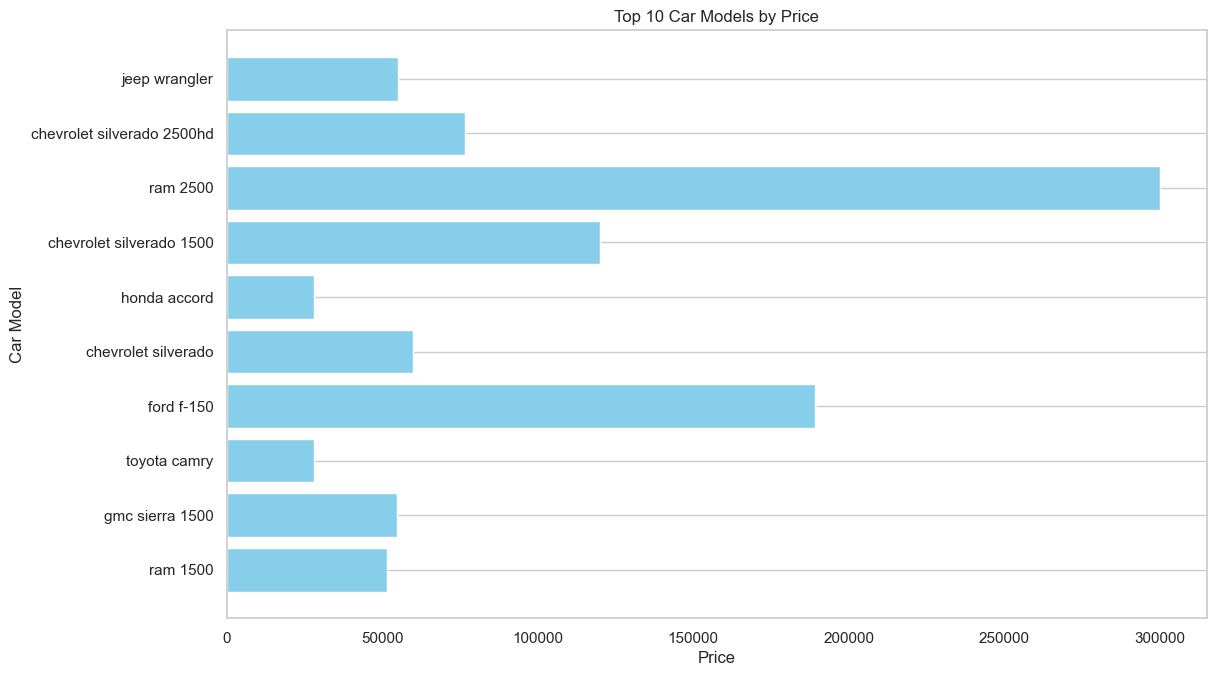

In [259]:
# Sort the DataFrame by price in ascending order
df_sorted = df.sort_values(by='price')

# Get the top 10 car models
top_10_models = df_sorted['model'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 models
df_top_10 = df_sorted[df_sorted['model'].isin(top_10_models)]
df_top_10 = df_top_10.sort_values(by='price')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['model'], df_top_10['price'], color='skyblue')
plt.title('Top 10 Car Models by Price')
plt.xlabel('Price')
plt.ylabel('Car Model')
plt.grid(axis='x')
plt.show()

* _We can see that Ram 2500 and Ford F-150 are the most expensive car models, and they both are pickup trucks. The high prices can be due to their versatility and ruggedness. Additionally, their popularity in certain regions and market segments contributes to increased demand, which further drives up prices._

Now, we explore the most common __production year__ for the two most common vehicles on the market. 

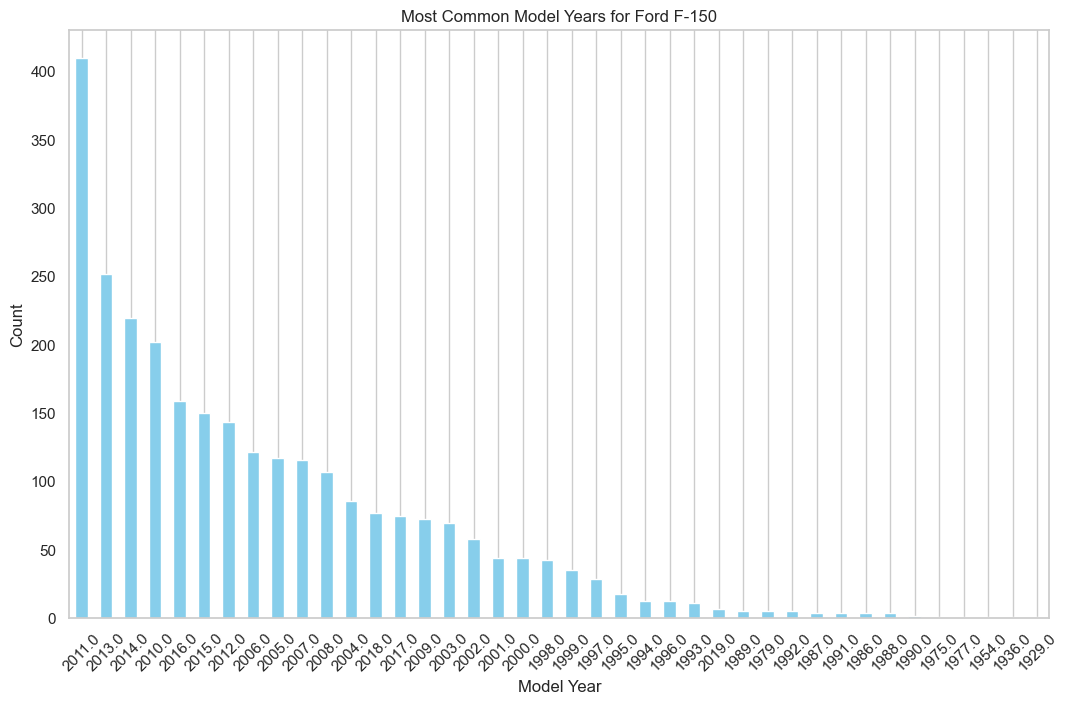

In [260]:
# Filter the DataFrame for Ford F-150
df_f150 = df[df['model'] == 'ford f-150']

# Count the occurrences of each model year
model_year_counts = df_f150['model_year'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Model Years for Ford F-150')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

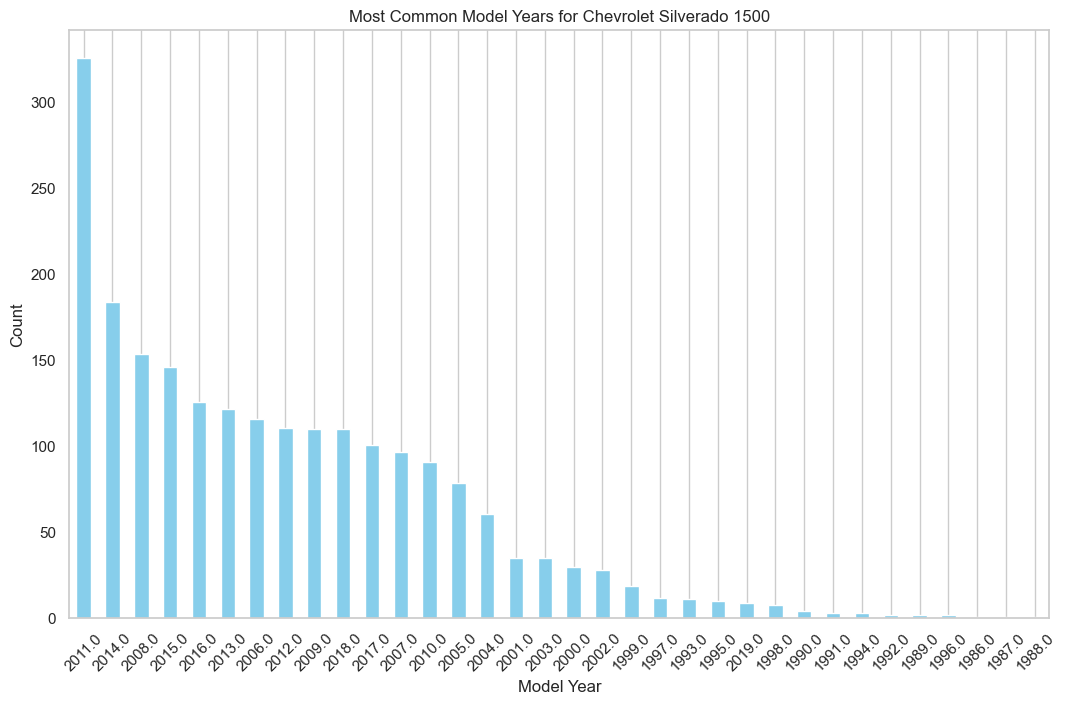

In [261]:
# Filter the DataFrame for Ford F-150
chevrolet_silverado_1500 = df[df['model'] == 'chevrolet silverado 1500']

# Count the occurrences of each model year
model_year_counts = chevrolet_silverado_1500['model_year'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Model Years for Chevrolet Silverado 1500')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
#chevrolet silverado 3500hd

_We can see an interesting insight from the two graphs above:_
* _Both Ford F-150 and Chevrolet Silverado 1500 were produced massively in 2011._
* _The outliers analyzed before, which are in good condition, have big mileage and cost more than the median can be attributed to the popularity of these specific models and their amount on the market._

[Back to Contents](#back)

# Findings <a id='end'></a>

We have analyzed the following three features:

1. Distribution of price and its correlation to condition and model year.
2. The correlation between odometer and condition. 
3. Top 10 car models, their types and price. 

After analyzing the data, we concluded:

1. We observed that newer models generally command higher prices, with additional nuances emerging when considering the condition of the vehicles, highlighting the importance of both factors in understanding pricing dynamics within the used car market.

2. We found that cars with lower mileage often tend to be in better condition. This suggests that mileage plays a significant role in determining the overall quality and value of used cars.

3. In summary, our analysis of the top 10 car models, their types, and prices underscores the dominance of pickup trucks, particularly the Ford F-150, which emerges as the most prevalent model. Additionally, the Chevrolet Silverado 1500 secures second place, further highlighting the popularity of trucks in the market. These findings emphasize the significance of truck models within the top rankings and their influence on the overall pricing dynamics of the analyzed dataset.

[Back to Contents](#back)